<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/shapefile_example_faster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
mylist = [float(i) for i in range(10000)]
myarr  = np.arange(10000, dtype=float)

In [0]:
%timeit [i * 5 for i in mylist]

1000 loops, best of 3: 509 µs per loop


In [0]:
%timeit myarr * 5

The slowest run took 19.87 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.49 µs per loop


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install geopandas

     |████████████████████████████████| 901kB 4.9MB/s 
     |████████████████████████████████| 17.9MB 41.5MB/s 
     |████████████████████████████████| 9.8MB 33.3MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=295231bc395e885585f47150190f111671378b21411346fa0fa75528fa44069d
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
np.random.randint?

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

# -- define filename
fname = "drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

# -- read in the file
zones = gp.GeoDataFrame.from_file(fname)

# -- get centroid coordinates
cenx = zones["geometry"].centroid.x.values
ceny = zones["geometry"].centroid.y.values

# -- pick a random centroid
np.random.seed(314)
ind = np.random.randint(len(cenx))
xr = cenx[ind]
yr = ceny[ind]

# -- get the distances to all centroids from random point
dist = np.sqrt((cenx - xr)**2 + (ceny - yr)**2)

# -- select only centroid indices where distance is less than some threshold
thr = 0.005
gind = dist < thr

# -- sub-select only those parks properties
sub = zones[gind]

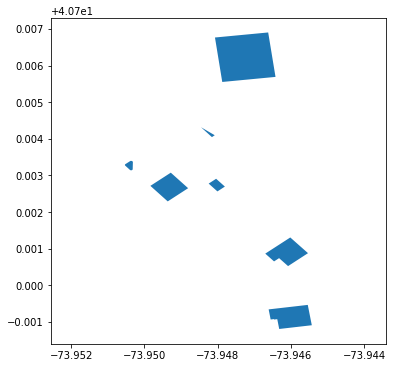

In [0]:
fig, ax = plt.subplots(figsize=[6, 6])
ax.axis("equal")
sub.plot(ax=ax)

In [0]:
# -- let's transform coordi

In [0]:
import pyproj as proj

In [0]:
proj.transform?

In [0]:
import matplotlib.pyplot as plt
import geopandas as gp


zones = gp.GeoDataFrame.from_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")

def getXY(pt):
    return (pt.x, pt.y)
  
centroidseries = zones['geometry'].centroid
centroidseries.head() 

centroidlist = map(getXY, centroidseries) 
list(centroidlist)[0]

#1. get the centroid for each park
import geopandas as gpd
import random as rd
import math
import matplotlib.pyplot as plt
#GeoDataFrame creation
points = gpd.read_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")
points.head()
centroids = points['geometry'].centroid
centroids.head() 

#2. pick a random point and find all centroids within 0.005 degrees

randomPoint = centroids[(int)(rd.random()*len(centroids))] 

def calculateDegreeDifference(a, b):
  return math.sqrt(math.pow(a.x-b.x, 2) + math.pow(a.y-b.y, 2))

centroidsTemp = centroids.copy() 

for i in centroids.index: 
  if(calculateDegreeDifference(centroids[i], randomPoint) >= 0.005):
    centroidsTemp = centroidsTemp.drop([i], axis=0) # geopandas filter points

centroidsTemp # print and see how mant points includ in this dataset 

#3. plot only those parks


fig, ax = plt.subplots(figsize=[6,6]) 
points = points[centroidsTemp.contains(points['geometry'].centroid)]    #http://geopandas.org/mapping.html can find in choropleth maps

points.plot(ax=ax)

#========AX?
